In [63]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [64]:
corelated_df = pd.read_csv("wine_quality_preprocessed.csv")
corelated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   volatile acidity  6497 non-null   float64
 1   chlorides         6497 non-null   float64
 2   density           6497 non-null   float64
 3   alcohol           6497 non-null   float64
 4   quality           6497 non-null   float64
 5   Wine Type_Red     6497 non-null   float64
 6   Wine Type_White   6497 non-null   float64
dtypes: float64(7)
memory usage: 355.4 KB


In [65]:
X = corelated_df[['volatile acidity', 'chlorides', 'density', 'alcohol']].values
y = corelated_df['quality'].values.reshape(-1, 1)

N = X.shape[0]
train_size = int(0.8 * N)
index_number = np.arange(N)
np.random.shuffle(index_number)
train_indices = index_number[:train_size]
test_indices = index_number[train_size:]
X_train = X[train_indices]
y_train = y[train_indices]
X_test = X[test_indices]
y_test = y[test_indices]
min_values_x = X_train.min(axis=0)
max_values_x = X_train.max(axis=0)
min_values_xt = X_test.min(axis=0)
max_values_xt = X_test.max(axis=0)
min_values_y = y_train.min(axis = 0)
max_values_y = y_train.max(axis = 0)
min_values_yt = y_test.min(axis = 0)
max_values_yt = y_test.max(axis = 0)
X_train_normalized = (X_train - min_values_x) / (max_values_x - min_values_x)
X_test_normalized = (X_test - min_values_xt) / (max_values_xt - min_values_xt)
y_train_normalized = (y_train - min_values_y) / (max_values_y - min_values_y)
y_test_normalized = (y_test - min_values_yt) / (max_values_yt - min_values_yt)

print("X_train_bias shape:", X_train_normalized.shape)
print("y_train shape:", y_train.shape)
print("X_test_bias shape:", X_test_normalized.shape)
print("y_test shape:", y_test.shape)

X_train_bias shape: (5197, 4)
y_train shape: (5197, 1)
X_test_bias shape: (1300, 4)
y_test shape: (1300, 1)


Weights (OLS):
[-0.24588527 -0.05522754  0.62133299  1.00546704]
Mean Squared Error: 0.05772924811119509


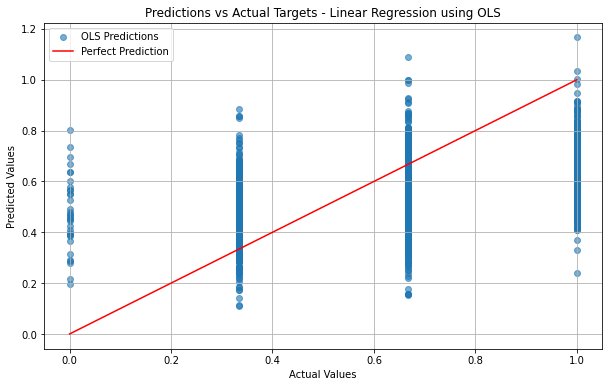

In [66]:
def calculate_weights(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y

def calculate_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

w = calculate_weights(X_train_normalized, y_train)
y_pred_ols = X_test_normalized @ w
mse = calculate_mse(y_test, y_pred_ols)
print(f'Weights (OLS):\n{w.flatten()}')
print(f'Mean Squared Error: {mse}')
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ols, alpha=0.6, label='OLS Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='-', label='Perfect Prediction') 
plt.title('Predictions vs Actual Targets - Linear Regression using OLS')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()
plt.show()


Ridge Regression Weights:
[-0.16495103  0.02759736  0.52223992  0.92981633]
Ridge Loss: 54.071186414959755
Mean Squared Error: 0.058984816076646046


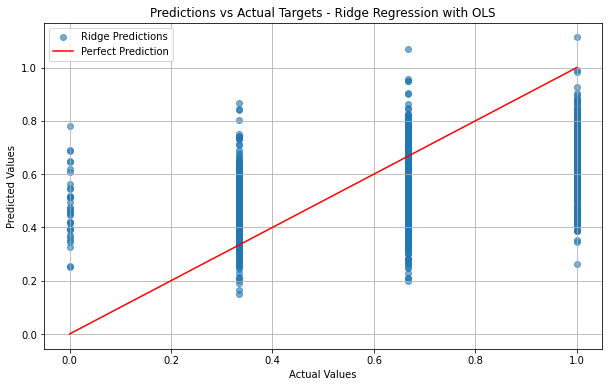

In [67]:
def ridge_regression_weights(X, y, lambd):
    I = np.eye(X.shape[1])
    w = np.linalg.inv(X.T @ X + lambd * I) @ X.T @ y
    return w

def ridge_objective_function(w, X, y, lambd):
    predictions = X @ w
    loss = 0.5 * np.sum((y - predictions) ** 2) + 0.5 * lambd * np.sum(w ** 2)
    return loss

lambd = 27
w_ridge = ridge_regression_weights(X_train, y_train, lambd)
y_pred_ridge = X_test_normalized @ w_ridge
loss = ridge_objective_function(w_ridge, X_test_normalized, y_test, lambd)
mse = calculate_mse(y_test, y_pred_ridge)
print(f'Ridge Regression Weights:\n{w_ridge.flatten()}')
print(f'Ridge Loss: {loss}')
print(f'Mean Squared Error: {mse}')
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.6, label='Ridge Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='-', label='Perfect Prediction')
plt.title('Predictions vs Actual Targets - Ridge Regression with OLS')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()
plt.show()
